# Q.2) Practice with Principal Component Analysis on a dataset and report the following results

1. Setup and Load the Dataset. Do clean up if necessary



In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("roles_life_cycle_mapping_wide.csv")
data.head()

,Job_Title,Flag,L1_Business opportunity,L2_Find data sources,L3_Explore and visualize data,L4_Develop data (Clean Data),L5_Develop data (Feature-engineer),L6_Develop data (Collect additional data),L7_Train models,L8_Deploy best model,L9_Monitor and manage model usage,L10_Measure success,L11_Retrain or retire model
0,AI / ML Specialist,1,2,3,4,3,3,2,4,4,3,3,4
1,AI Adoption Specialist,1,3,1,1,1,1,0,2,2,3,4,1
2,AI Innovation Leader,1,4,1,1,0,1,1,1,1,2,3,2
3,AI Risk & Ethics Specialist,1,3,2,2,1,2,2,1,2,2,2,1
4,AI Test & Evaluation Specialist,1,1,1,2,1,2,2,2,4,4,4,2


In [3]:
print(data.isnull().sum())


Job_Title                                    0
Flag                                         0
L1_Business opportunity                      0
L2_Find data sources                         0
L3_Explore and visualize data                0
L4_Develop data (Clean Data)                 0
L5_Develop data (Feature-engineer)           0
L6_Develop data (Collect additional data)    0
L7_Train models                              0
L8_Deploy best model                         0
L9_Monitor and manage model usage            0
L10_Measure success                          0
L11_Retrain or retire model                  0
dtype: int64


2. Data preprocessing - standardization to zero-mean

In [5]:
from sklearn.preprocessing import StandardScaler

# Select the relevant columns (L1 to L11)
features = ['L1_Business opportunity', 'L2_Find data sources', 'L3_Explore and visualize data',
            'L4_Develop data (Clean Data)', 'L5_Develop data (Feature-engineer)',
            'L6_Develop data (Collect additional data)', 'L7_Train models',
            'L8_Deploy best model', 'L9_Monitor and manage model usage',
            'L10_Measure success', 'L11_Retrain or retire model']

X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(pd.DataFrame(X_scaled).head())


         0         1         2         3         4         5         6   \
0 -0.616872  0.454257  0.963852  0.341972  0.668339 -0.362554  1.632993   
1  0.129113 -1.362770 -1.584637 -1.351605 -1.375992 -2.158061  0.000000   
2  0.875097 -1.362770 -1.584637 -2.198394 -1.375992 -1.260308 -0.816497   
3  0.129113 -0.454257 -0.735141 -1.351605 -0.353827 -0.362554 -0.816497   
4 -1.362857 -1.362770 -0.735141 -1.351605 -0.353827 -0.362554  0.000000   

         7         8         9         10  
0  1.484945  0.442181  0.251155  1.382189  
1 -0.107161  0.442181  0.938526 -0.863868  
2 -0.903214 -0.299542  0.251155 -0.115182  
3 -0.107161 -0.299542 -0.436216 -0.863868  
4  1.484945  1.183904  0.938526 -0.115182  


3. Perform PCA on the given dataset


In [6]:
from sklearn.decomposition import PCA

pca = PCA()

X_pca = pca.fit_transform(X_scaled)

print(pd.DataFrame(X_pca).head())


         0         1         2         3         4         5         6   \
0  2.192857 -0.887657 -1.288829  0.469749 -1.035580  0.707123 -0.161425   
1 -2.160953 -2.748097  0.668742 -0.728120  0.284912  0.043318 -0.574047   
2 -2.679792 -1.954108  1.862331 -0.091537  0.264732 -0.262569  0.177993   
3 -1.762995 -0.381651  0.591493  0.217433  0.007119 -0.455577 -0.132007   
4 -0.343743 -2.623507 -0.909770  0.083760  0.877364 -0.136235 -0.373446   

         7         8         9         10  
0  0.214794 -0.111576  0.335270 -0.062743  
1 -0.688878  0.467669  0.439606  0.313339  
2  0.357024 -0.180020  0.531882  0.085162  
3 -0.400852 -0.716513  0.035506  0.006812  
4 -0.593917 -1.140388 -0.371257 -0.533597  


4. Create a scree plot and decide on the number of principal components to retain; state the percentage of variance retained for the transformed dataset.


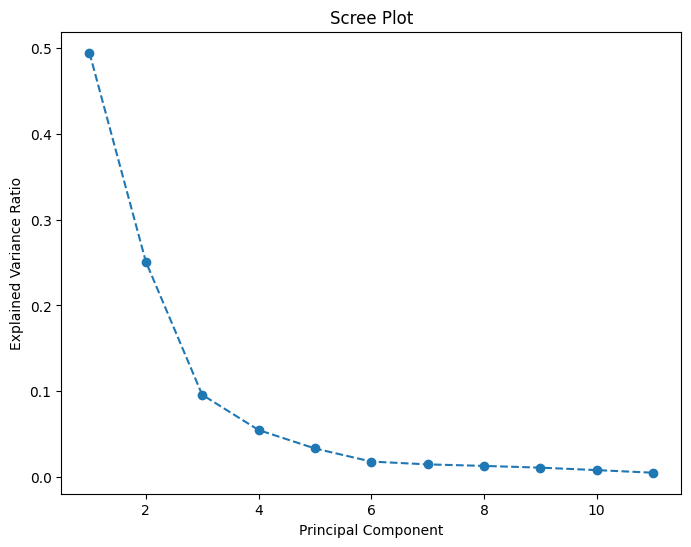

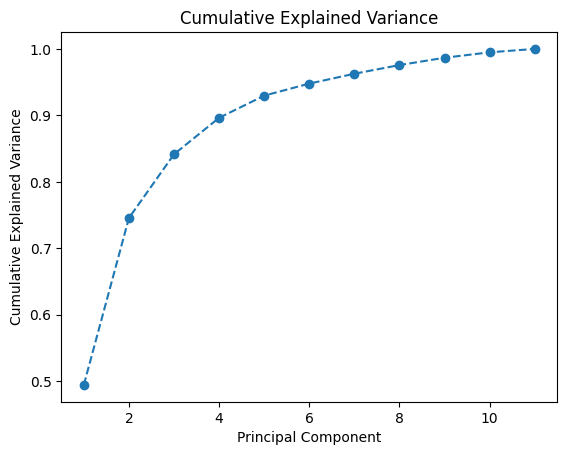

In [7]:
import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

cumulative_variance = explained_variance.cumsum()

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.show()


5. Output the transformed dataset


In [8]:
print(cumulative_variance[:3])

[0.49443601 0.74555454 0.84147414]


### State the percentage of variance retained for the transformed dataset: 84.1%

6. Create a scatter plot of the first two principal components and interpret the result.

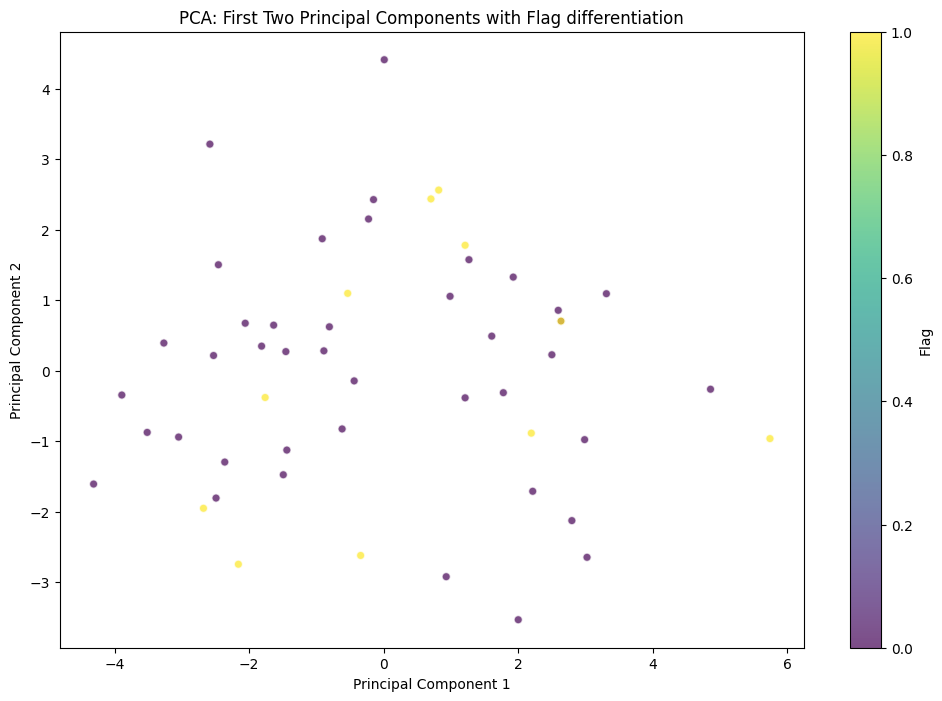

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_reduced = pca.fit_transform(X_scaled)

transformed_data = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(2)])

colors = data['Flag']

plt.figure(figsize=(12, 8))
scatter = plt.scatter(transformed_data['PC1'], transformed_data['PC2'],
                      c=colors, cmap='viridis', alpha=0.7, edgecolors='w')

plt.title('PCA: First Two Principal Components with Flag differentiation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.colorbar(scatter, label='Flag')

plt.show()


# Q.3) Feature Selection

Goal: predict fat percentage (fatpctg) using all other features available in the data (all but age). Conduct feature selection using one method from each of the category (1) wrapper; (2) embedded method, (3) filter method. Output top n features for each the model.

### Dataset: BMI.csv

In [13]:
import pandas as pd
import numpy as np

data_bmi = pd.read_csv("BMI.csv")
data_bmi.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,fatpctg
0,22,160.8,62.4,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
1,22,170.6,80.5,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,23,153.9,69.3,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
3,23,157.1,70.4,35.5,92.1,77.1,93.9,56.1,36.1,22.7,30.5,27.2,18.2,9.4
4,23,196.5,88.6,38.0,96.6,85.3,102.5,59.1,37.6,23.2,31.8,29.7,18.3,10.3


In [18]:
X = data_bmi.drop(columns=['Age', 'fatpctg'])
y = data_bmi['fatpctg']

## Wrapper method: Forward selector


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

model = LinearRegression()

forward_selector = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')
forward_selector.fit(X, y)

selected_features_forward = X.columns[forward_selector.get_support()]

print("Top features from Forward Selection:")
print(selected_features_forward)


Top features from Forward Selection:
Index(['Weight', 'Neck', 'Abdomen', 'Hip', 'Forearm'], dtype='object')


## Embedded Method - Lasso Regression

In [20]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5)
lasso.fit(X, y)

lasso_selected_features = X.columns[lasso.coef_ != 0]

print("\nTop features from Lasso Regression:")
print(lasso_selected_features)



Top features from Lasso Regression:
Index(['Weight', 'Height', 'Neck', 'Abdomen', 'Thigh'], dtype='object')


## Filtering method - Correlation

Since both the values are continuous.

In [21]:
correlation_matrix = X.corrwith(y)

correlation_sorted = correlation_matrix.abs().sort_values(ascending=False)

top_correlated_features = correlation_sorted.head(5)

print("\nTop features based on correlation with fatpctg:")
print(top_correlated_features)



Top features based on correlation with fatpctg:
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
dtype: float64
